In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [185]:
# Read in data
df = pd.read_csv('./IMDB Dataset.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(50000, 2)
(500, 2)


In [186]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


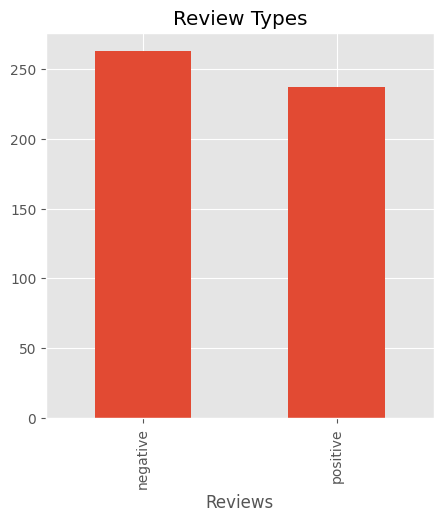

In [187]:
# Data Analysis
ax = df['sentiment'].value_counts().sort_index() \
        .plot(kind= 'bar',
              title= "Review Types",
              figsize= (5,5))
ax.set_xlabel("Reviews")

plt.show()

In [188]:
# Basic Preprocessing
'''
#lowercasing
df['review']= df['review'].str.lower()
'''
#removing html elements
import re
 
def html_removal(text):
   text = re.compile(r'<[^>]+>').sub('', text)
   return text
df['review'] = df['review'].apply(html_removal)

'''
#removing punctuation
import string
def remove_punc(text):
  exclude = string.punctuation
  for char in exclude:
    text = text.replace(char,'')
  return text


df['review'] = df['review'].apply(remove_punc)
'''

"\n#removing punctuation\nimport string\ndef remove_punc(text):\n  exclude = string.punctuation\n  for char in exclude:\n    text = text.replace(char,'')\n  return text\n\n\ndf['review'] = df['review'].apply(remove_punc)\n"

In [189]:
#Basic NLTK
example = df['review'][10]
print(example)
tokens = nltk.word_tokenize(example)
tokens[:10]

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.I imagine this film would appeal to a stoner who is currently partaking.For something similar but better try "Brother from another planet"


['Phil',
 'the',
 'Alien',
 'is',
 'one',
 'of',
 'those',
 'quirky',
 'films',
 'where']

In [190]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [191]:
sia = SentimentIntensityAnalyzer()

In [192]:
score = sia.polarity_scores(example)

print(score['compound'])

if(score['compound']>=0.05):
    print("Positive")
elif(score['compound']<0.05 and score['compound']>-0.05):
    print("Neutral")
else:
    print("Negative")

0.9447
Positive
